In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
master = pd.read_csv('data/master_503107.csv')
master.head()

,patent_number,grant_year,app_year,num_inventors,us_inventor,cite_foreign_patent,is_missing,num_design_cited,num_utility_cited,non-pat_refs,num_figures,num_assignees,missing_data,family_size,country_transformed,priority_year
0,D257752,1981,1980,1,1,0,1,1,2,1,6,1,0,1,US,1980
1,D257924,1981,1980,1,1,0,1,1,2,1,6,1,0,1,US,1980
2,D258382,1981,1980,2,1,0,1,2,1,0,5,1,0,1,US,1980
3,D258383,1981,1980,2,1,0,1,2,1,0,5,1,0,1,US,1980
4,D258678,1981,1980,2,1,0,1,2,1,0,5,1,0,1,US,1980


Mean difference between priority and application dates overtime

Text(0.5,0,'Time Difference in Years')

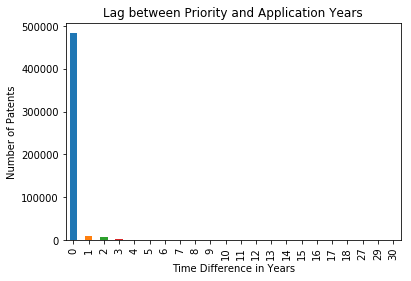

In [8]:
master['priority_app_gap'] = master['app_year'] - master['priority_year']

ax = master.groupby('priority_app_gap')['grant_year'].count().plot(kind='bar')
ax.set_title('Lag between Priority and Application Years')
ax.set_ylabel('Number of Patents')
ax.set_xlabel('Time Difference in Years')

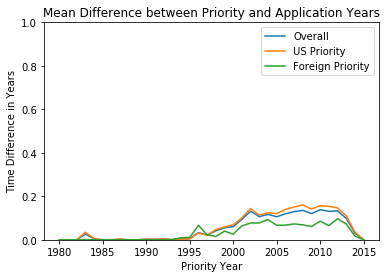

In [40]:
fig, ax = plt.subplots()

overall = master.groupby('priority_year')['priority_app_gap'].mean().plot(kind='line', label='Overall')

master.loc[master.country_transformed.str.match('US')]\
.groupby('priority_year')['priority_app_gap'].mean().plot(kind='line', label='US Priority')

master.loc[~master.country_transformed.str.match('US')]\
.groupby('priority_year')['priority_app_gap'].mean().plot(kind='line', label='Foreign Priority')

ax.set_ylim([0,1.0])
ax.set_ylabel('Time Difference in Years')
ax.set_xlabel('Priority Year')
ax.set_title('Mean Difference between Priority and Application Years')
ax.legend()

In [13]:
master.priority_app_gap.mean()

0.07557040550022162

In [17]:
master.priority_year.describe()

count    503107.000000
mean       2003.102626
std           8.901898
min        1980.000000
25%        1997.000000
50%        2005.000000
75%        2011.000000
max        2015.000000
Name: priority_year, dtype: float64